In [55]:
import emcee
import numpy as np
import matplotlib.pyplot as plt
import dlsfunctions as dls
import seaborn as sns
import pandas as pd

In [56]:
%%latex
The goal of this notebook is to test to see which is the most preferred range for the number of walkers and samples for 
Bayesian dls analysis. So far, individual testing from different trials with simulated data have shown that the number of
walkers and samples directly affect the acceptance fraction of the resulting sampler after emcee is run. This indicates
that there must be a preferred range for the number of walkers and samples for Bayesian dls analysis. 

<IPython.core.display.Latex object>

In [57]:
r = 2.24e-9 
diameter = r*2
sigma = 2e-10
c = 1

m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1



d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)
time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

In [58]:
theta_input = np.append(f_1, beta)

In [59]:
sim_data = dls.g2(theta_input, d, m, gamma, time_in)

In [60]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [61]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)


In [62]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

In [63]:
result = sampler.run_mcmc(start_pos, nsteps)

In [64]:
sampler.acceptance_fraction

array([0.348     , 0.331     , 0.32833333, 0.35033333, 0.34      ,
       0.334     , 0.33733333, 0.34166667, 0.33133333, 0.325     ,
       0.33866667, 0.355     , 0.34233333, 0.34166667, 0.31833333,
       0.33033333, 0.32133333, 0.344     , 0.34866667, 0.37066667,
       0.32466667, 0.317     , 0.338     , 0.337     , 0.34266667,
       0.335     , 0.326     , 0.33866667, 0.34266667, 0.338     ,
       0.33733333, 0.348     , 0.338     , 0.34      , 0.34333333,
       0.33633333, 0.32366667, 0.32166667, 0.34966667, 0.32433333,
       0.349     , 0.34533333, 0.34      , 0.34866667, 0.33366667,
       0.35      , 0.32333333, 0.338     , 0.33633333, 0.33666667,
       0.322     , 0.334     , 0.33066667, 0.348     , 0.33066667,
       0.32866667, 0.35266667, 0.33466667, 0.34866667, 0.33866667,
       0.35333333, 0.34433333, 0.349     , 0.33966667, 0.32133333,
       0.33133333, 0.33033333, 0.32866667, 0.33766667, 0.338     ,
       0.341     , 0.34733333, 0.33633333, 0.35133333, 0.356  

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

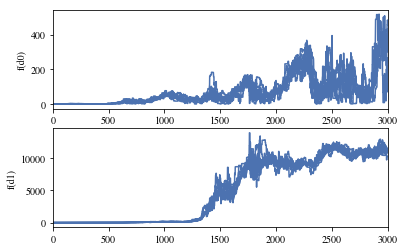

In [65]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

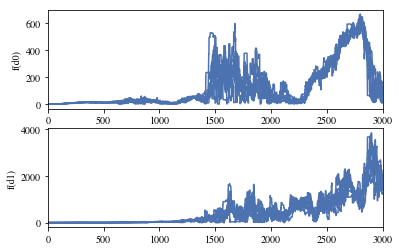

In [66]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d0)')
ax3.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)

In [67]:
samples = sampler.chain[:,2000:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

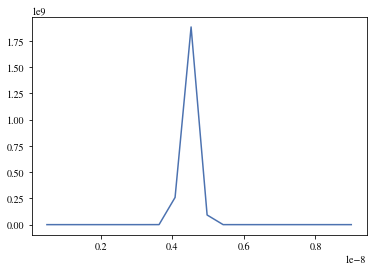

In [68]:
q_50 = q.quantile([0.16], axis=0)
q_50_array = q_50.values
q_50_array = q_50_array.flatten()
q_50_array.shape
plt.plot(d, q_50_array)

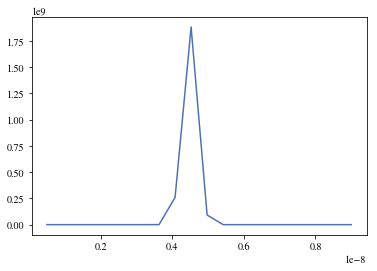

In [69]:
plt.plot(d, f_1)